# Time series clustering exercise

In [47]:
import os #OS commands
import numpy as np
import pandas as pd
import geopandas as gp
import pylab as pl
%pylab inline
from zipfile import ZipFile
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import AgglomerativeClustering

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'dist', 'colors', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

In [48]:
#!for i in $(seq 0 9); do \
#wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp0$i\totals.zip -p $PUIdata; done

In [49]:
#!for i in $(seq 10 14); do \
#wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp$i\totals.zip -p $PUIdata; done

In [50]:
#!for i in $(seq 94 99); do \
#wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp$i\totals.zip -p $PUIdata; done

In [51]:
#for filename in os.listdir("/nfshome/tp1600/PUIdata/BusCen"):
#       with ZipFile("/nfshome/tp1600/PUIdata/BusCen/" + filename) as zipref: 
#               zipref.extractall("/nfshome/tp1600/PUIdata/BusCen/")

In [52]:
df_all = pd.read_csv("/nfshome/tp1600/PUIdata/BusCen/zbp00totals.txt")
df_all = df_all.rename(columns={'ZIP' : 'zip'})

In [53]:
for filename in os.listdir("/nfshome/tp1600/PUIdata/BusCen"): 
    file = filename.split('.')
    end = file[1]
    #print(file[0][3:5])
    if end =='txt': 
        df = pd.read_csv("/nfshome/tp1600/PUIdata/BusCen/" + filename)
        df.columns = map(str.lower, df.columns)
        colname = 'est' + file[0][3:5]
        dfsub = df[['zip', 'est']]
        dfsub = dfsub.rename(columns={'est' : str(colname)})
    df_all = df_all.merge(dfsub, how='outer')

In [54]:
df_all

,zip,NAME,EMPFLAG,EMP,QP1,AP,EST,est03,est11,est04,...,est95,est06,est12,est08,est98,est07,est14,est05,est09,est02
0,501.0,"HOLTSVILLE, NY",A,0.0,0.0,0.0,1.0,7.0,2.0,8.0,...,2.0,8.0,2.0,3.0,3.0,5.0,4.0,2.0,2.0,11.0
1,1001.0,"AGAWAM, MA",NaN,8042.0,59833.0,259661.0,493.0,505.0,436.0,500.0,...,439.0,509.0,453.0,477.0,444.0,503.0,458.0,509.0,458.0,490.0
2,1002.0,"AMHERST, MA",NaN,6547.0,36719.0,169658.0,563.0,586.0,558.0,584.0,...,467.0,582.0,572.0,584.0,490.0,596.0,560.0,589.0,571.0,566.0
3,1003.0,"AMHERST, MA",NaN,82.0,308.0,2482.0,13.0,16.0,16.0,15.0,...,10.0,12.0,15.0,17.0,14.0,16.0,18.0,12.0,16.0,15.0
4,1004.0,"AMHERST, MA",NaN,717.0,2049.0,5826.0,48.0,21.0,19.0,43.0,...,48.0,30.0,16.0,18.0,31.0,20.0,13.0,31.0,18.0,23.0
5,1005.0,"BARRE, MA",NaN,764.0,4470.0,20413.0,86.0,93.0,91.0,97.0,...,95.0,98.0,94.0,97.0,95.0,106.0,97.0,94.0,87.0,94.0
6,1007.0,"BELCHERTOWN, MA",NaN,1406.0,7305.0,31639.0,219.0,230.0,217.0,232.0,...,172.0,238.0,217.0,246.0,183.0,243.0,226.0,225.0,230.0,212.0
7,1008.0,"BLANDFORD, MA",NaN,221.0,875.0,3660.0,21.0,25.0,20.0,21.0,...,19.0,18.0,18.0,16.0,18.0,18.0,18.0,19.0,20.0,28.0
8,1009.0,"BONDSVILLE, MA",NaN,154.0,1238.0,6515.0,17.0,22.0,14.0,20.0,...,16.0,21.0,16.0,19.0,17.0,18.0,17.0,22.0,18.0,19.0
9,1010.0,"BRIMFIELD, MA",NaN,404.0,2180.0,9691.0,73.0,68.0,79.0,66.0,...,53.0,78.0,78.0,75.0,63.0,74.0,74.0,64.0,77.0,70.0


 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


In [55]:
#!wget -P $PUIDATA https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

In [56]:
#!unzip $PUIDATA/application%2Fzip -d $PUIDATA

## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [57]:
#import pandas as pd
#import zipfile 
#zf = zipfile.ZipFile(fname)
#df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [121]:
import geopandas as gp
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [122]:
df_all = df_all.drop(['NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST'], axis=1)

ValueError: labels ['NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST'] not contained in axis

In [123]:
merged = pd.DataFrame(nyczips, columns=['zip'])

In [61]:
merged = merged.set_index(['zip'])

In [62]:
merged = merged.merge(df_all, right_on='zip', left_index=True, how='left')

In [63]:
merged['zip'] = merged.zip.astype(int)

In [64]:
merged = merged.set_index('zip')

In [91]:
# confirm there are 263 zipcodes and 20 years
merged.shape

(263, 20)

In [94]:
merged.columns

Index(['est00', 'est01', 'est02', 'est03', 'est04', 'est05', 'est06', 'est07',
       'est08', 'est09', 'est10', 'est11', 'est12', 'est13', 'est14', 'est94',
       'est95', 'est96', 'est98', 'est99'],
      dtype='object')

In [98]:
merged.sort(axis=1, inplace=True)
merged=merged[['est94','est95', 'est96', 'est98', 'est99', 'est00', 'est01', 'est02', 'est03', 'est04', 
         'est05', 'est06', 'est07', 'est08', 'est09', 'est10', 'est11', 'est12', 'est13', 'est14']]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [99]:
cleancsb = merged.dropna(axis=0, how='all')

In [100]:
#cleaning all missing values
cleancsb.shape

(260, 20)

In [101]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T


In [102]:
#confirm the stats-- the all look right!
vals.mean(axis=1)
vals.mean(axis=1).shape
vals.std(axis=1)
vals.std(axis=1).shape

(260,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [103]:
#dropping nans to enable clustering
valsclean = vals.dropna()

In [104]:
nc = 2
#cluster with kmeans
km = KMeans(n_clusters = nc, random_state = 444).fit(valsclean)

In [105]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

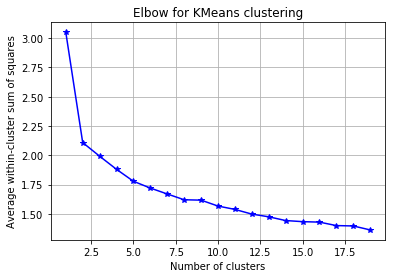

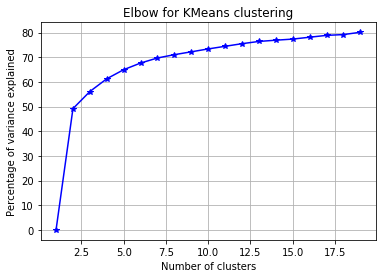

In [106]:
elbow(valsclean, range(1,20))

Figure: The above plots show the performance of clustering by number of clusters to enable use of the elbow method. From above, we can see that 2 appears to be the best number of clusters based on the elbow method. I will test with number of clusters between 2 and 5.

In [107]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(243,)

In [108]:
valsclean['cluster1'] = km.labels_
cluster1 = km.cluster_centers_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
km2 = KMeans(n_clusters = 3, random_state = 444).fit(valsclean)
valsclean['cluster2'] = km2.labels_
cluster2 = km2.cluster_centers_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [110]:
km3 = KMeans(n_clusters = 4, random_state = 444).fit(valsclean)
valsclean['cluster3'] = km3.labels_
cluster3 = km3.cluster_centers_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [111]:
km4 = KMeans(n_clusters = 5, random_state = 444).fit(valsclean)
valsclean['cluster4'] = km4.labels_
cluster4 = km4.cluster_centers_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### The map of the clusters may look something like this

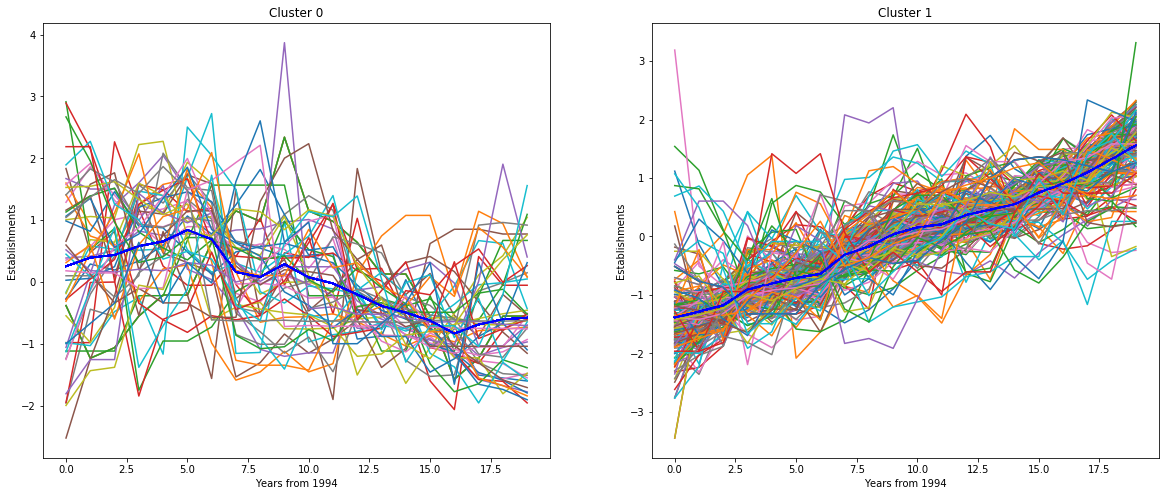

In [112]:
fig, axes = pl.subplots(1,2, figsize=(20,8))
for c, ax in enumerate(fig.axes): 
    for i in range(len(valsclean[valsclean['cluster1']==c])):
        ax.plot(valsclean[valsclean['cluster1']==c].iloc[i, 0:20].values)
        ax.plot(cluster1[c], color='blue')
        ax.set_title('Cluster {}'.format(c))
        ax.set_ylabel('Establishments')
        ax.set_xlabel('Years from 1994')

Figure: These plots show the data for zipcodes in cluster 0 and cluster 1 based on a 2 cluster model, as well as the cluster center lines in blue. Cluster 0 appears to have a decreasing trend, while cluster 2 has an increasing trend.You can see that cluster one and zero both have zips which vary significantly from the center.

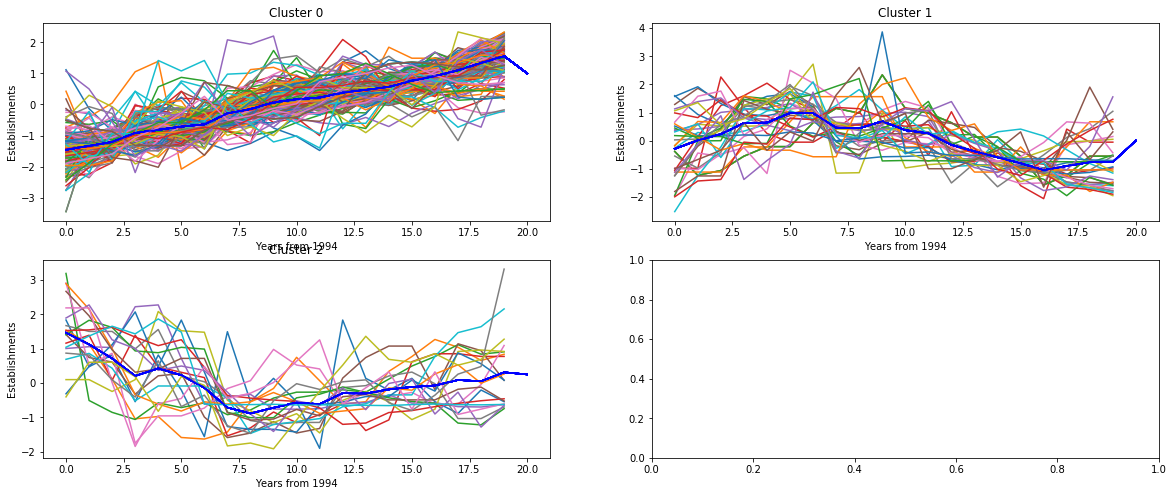

In [113]:
fig, axes = pl.subplots(2, 2, figsize=(20,8))
for c, ax in enumerate(fig.axes): 
    for i in range(len(valsclean[valsclean['cluster2']==c])):
        ax.plot(valsclean[valsclean['cluster2']==c].iloc[i, 0:20].values)
        ax.plot(cluster2[c], color='blue')
        ax.set_title('Cluster {}'.format(c))
        ax.set_ylabel('Establishments')
        ax.set_xlabel('Years from 1994')

Figure: These plots show the data for zipcodes in cluster 0, cluster 1, and cluster 2 based on a 3 cluster model, as well as the cluster center lines in blue. You can see that cluster two appears to have a relatively good fit, but there are still many outliers in all clusers. Cluster 0 appears to be increasing steadily while Clusters 1 and 2 are not as straightforward.

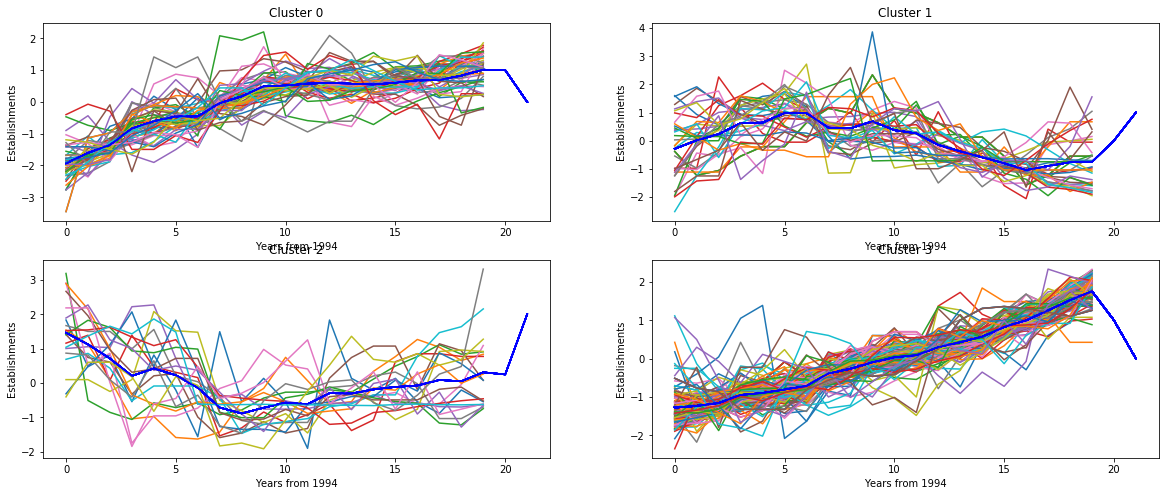

In [114]:
fig, axes = pl.subplots(2, 2, figsize=(20,8))
for c, ax in enumerate(fig.axes): 
    for i in range(len(valsclean[valsclean['cluster3']==c])):
        ax.plot(valsclean[valsclean['cluster3']==c].iloc[i, 0:20].values)
        ax.plot(cluster3[c], color='blue')
        ax.set_title('Cluster {}'.format(c))
        ax.set_ylabel('Establishments')
        ax.set_xlabel('Years from 1994')

Figure: These plots show the data for zipcodes in clusters 0-3 based on a 4 cluster model, as well as the cluster center lines in blue. You can see that cluster one and cluster 3 appear to have relatively good increasing trend fits with many variations at only a few points. Cluster 1 and cluster 2 also have data which follows a similar trend but with some more variation across the entire trend. 

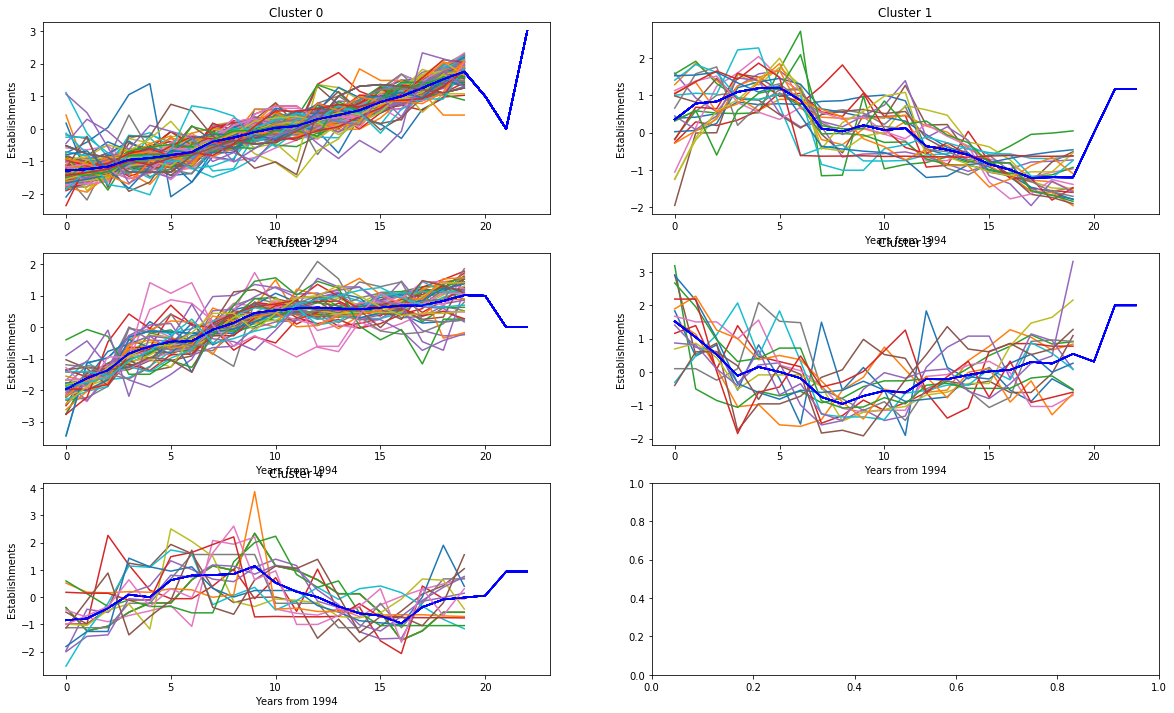

In [115]:
fig, axes = pl.subplots(3, 2, figsize=(20,12))
for c, ax in enumerate(fig.axes): 
    for i in range(len(valsclean[valsclean['cluster4']==c])):
        ax.plot(valsclean[valsclean['cluster4']==c].iloc[i, 0:20].values)
        ax.plot(cluster4[c], color='blue')
        ax.set_title('Cluster {}'.format(c))
        ax.set_ylabel('Establishments')
        ax.set_xlabel('Years from 1994')

Figure: These plots show the data for zipcodes in clusters 0-4 based on a 5 cluster model, as well as the cluster center lines in blue. You can see that cluster zero and two show increasing trends, while cluster 1 shows a decreasing trend and clusters 3 and 4 show volatility.

In [116]:
clust4 = {valsclean.index[i]:km4.labels_[i] for i in range(len(km4.labels_))}

In [124]:
nyczipsshp['zipjoin'] = nyczipsshp.ZIPCODE.astype(int)

In [125]:
nyczipsshp = nyczipsshp.merge(valsclean[['cluster1', 'cluster2', 'cluster3', 'cluster4']], left_on='zipjoin', right_index=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


darkslategrey 0
blue 1
teal 2
deepskyblue 3
cyan 4


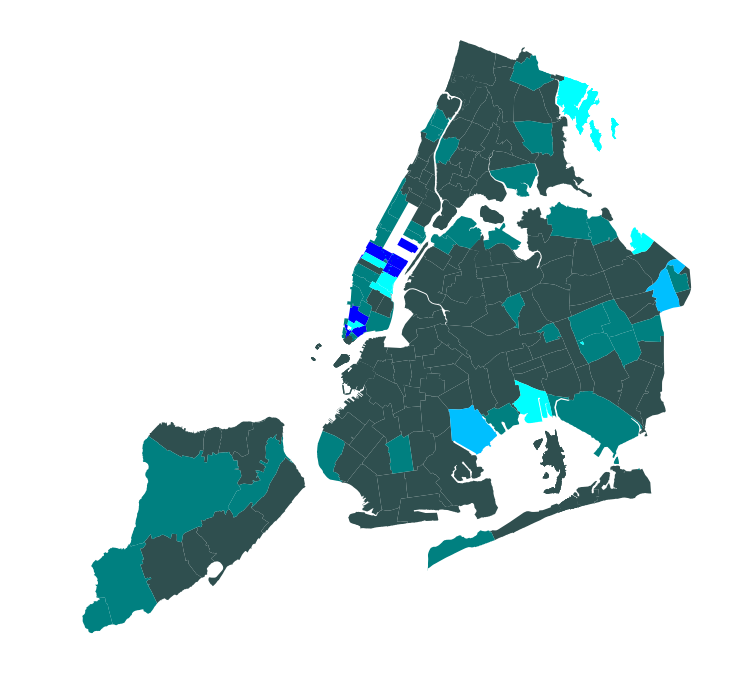

In [132]:
colors = ['darkslategrey','blue','teal','deepskyblue','cyan']
f, ax = plt.subplots(1, figsize=(12, 12)) 
for c in range(max(clust4.values())+1): #for each cluster
    nyczipsshp.loc[nyczipsshp.cluster4==c].plot(axes=ax, color=colors[c], legend=True)
    print(colors[c], c)
ax.axis('off')
ax.legend()

Figure: The map above shows a map of New York City with colors indicating the cluster based on a 5-cluster KMeans model. You can see that cluster 0 (in darkslate) and cluster 2 (teal) cover the majority of regions in outer boroughs with a increasing economic trend-- while areas of midtown and downtown Manhattan belong to the same cluster, cluster 1 (blue) which shows a somewhat decreasing trend. Clusters 3 and 4 in lighter shades of blue seem to be a bit more volatile.

In [42]:
...

Ellipsis

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

In [43]:
...

Ellipsis

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [44]:
final = valsclean.iloc[:, :-4]

In [45]:
agc = AgglomerativeClustering(n_clusters=6, linkage='average').fit(final)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

In [46]:
labelsag

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


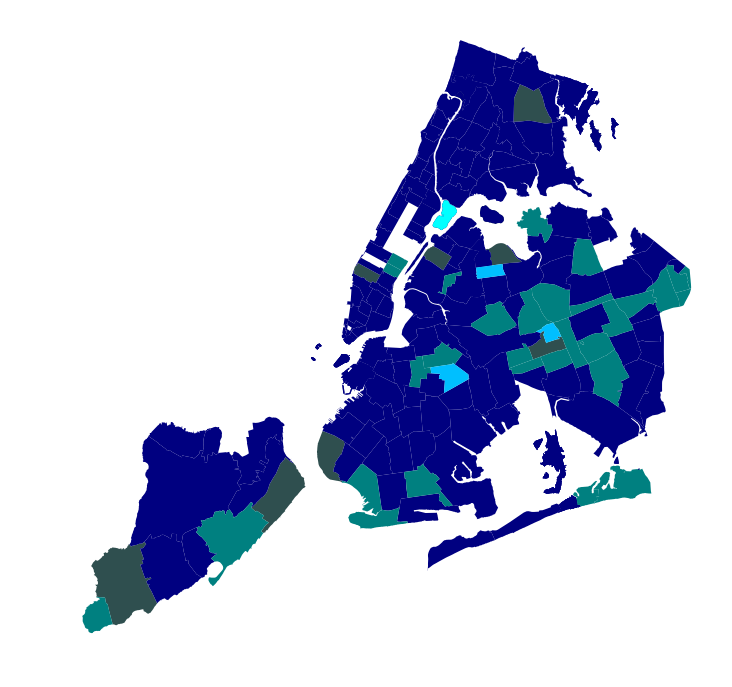

In [47]:
colors = ['darkslategrey','navy','teal','deepskyblue','cyan']
f, ax = plt.subplots(1, figsize=(12, 12)) 
for c in range(0,5): #for each cluster
    nyczipsshp.loc[labelsag==c].plot(axes=ax, color=colors[c], legend=True)
ax.axis('off')
ax.legend()

Figure: The map above shows NYC zipcodes colored based on a agglomerative clustering model with 6 clusters. Similar clusters to the prior clustering, showing groupings in midtown. However, this type of clustering 

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

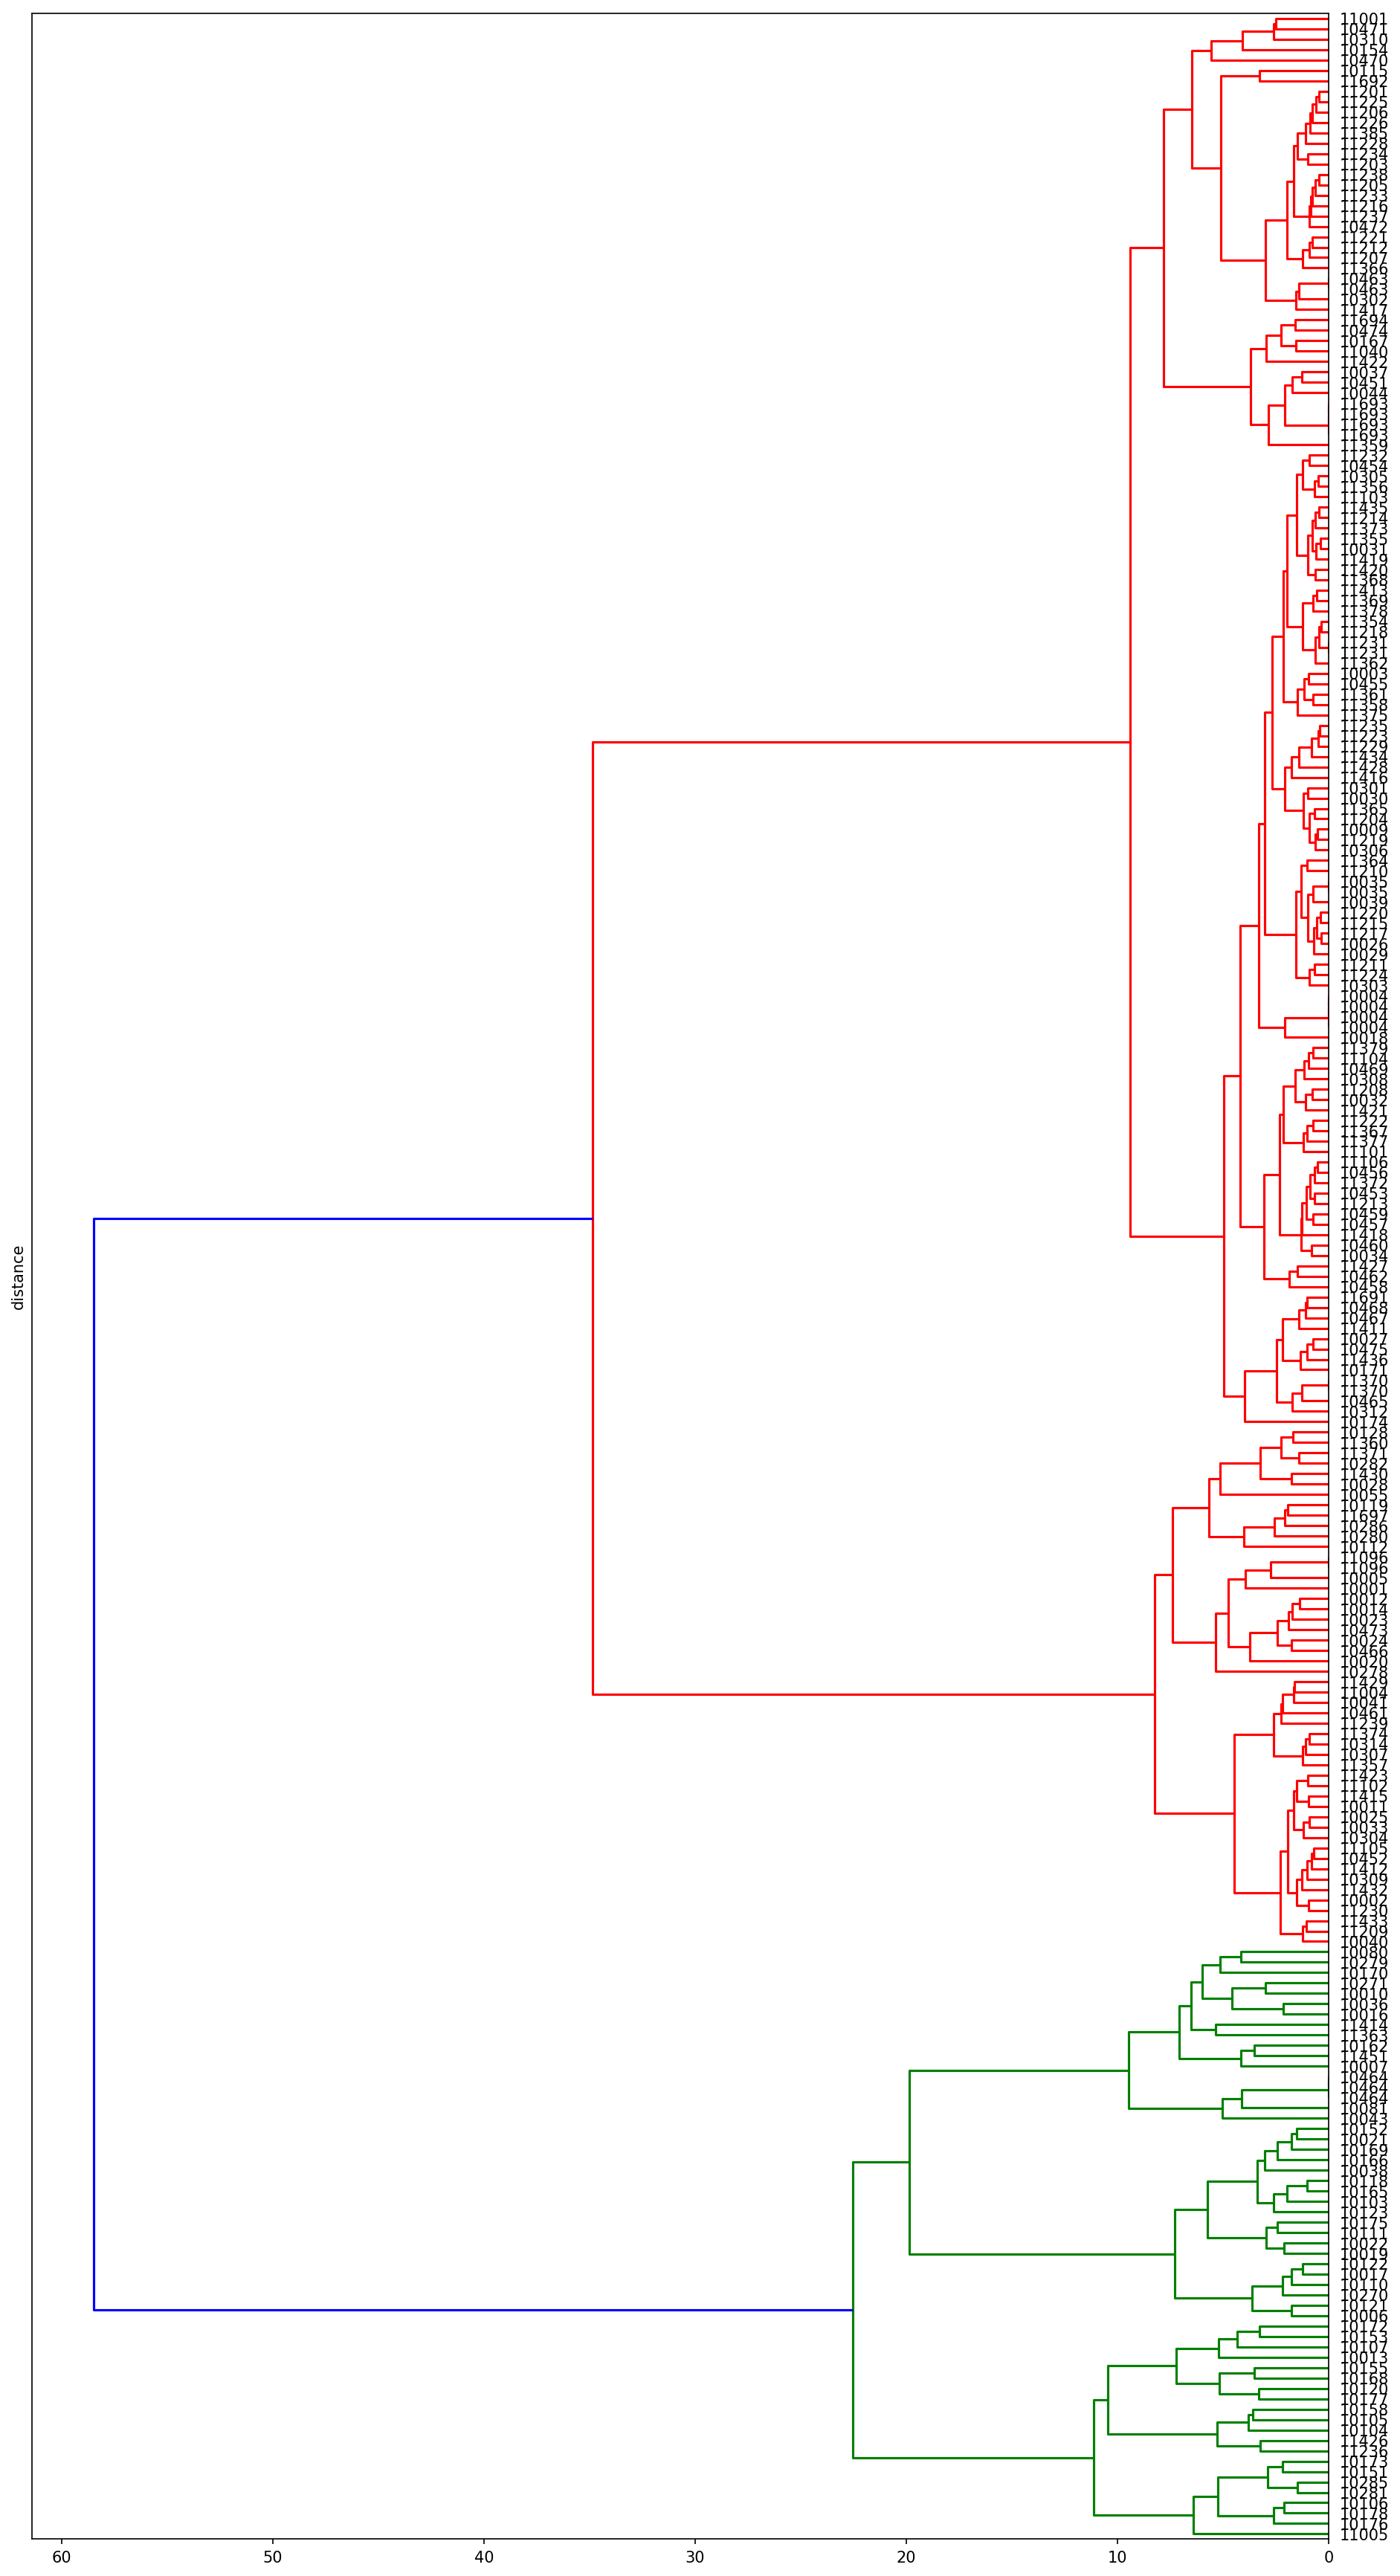

In [48]:
import scipy.cluster as scp
fig = pl.figure(figsize=(15,30), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(valsclean, method='ward'),
                               labels = valsclean.index, orientation='left', 
                               leaf_rotation=0.,  # rotates the x axis labels
                               leaf_font_size=10.)  # font size for the x axis labels)